# Approachs

1.Load the data and libraries

2.Data Preparation and Data Transformation

3.Data Visualization

4.Data Analysis

   Uni Variate
   Bi- Variate
   Multi- Variate

5.Classification

6.Logistic Regression

7.Decision Tree

8.Random Forest

9.Boosting

Evaluate the model

*Apply the model to test data

*Evaluate results using the submission data

*Dataset Name: Ford Stay Alert

*Author: VIKRAM

*Date: 23/02/2024

*Version: 1

# LOAD THE LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the dataset

In [ ]:
!unzip '/content/stayalert (4).zip'

Archive:  /content/stayalert (4).zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


import the data


In [ ]:
train=pd.read_csv('/content/fordTrain.csv')
test=pd.read_csv('/content/fordTest.csv')

In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

<Axes: >

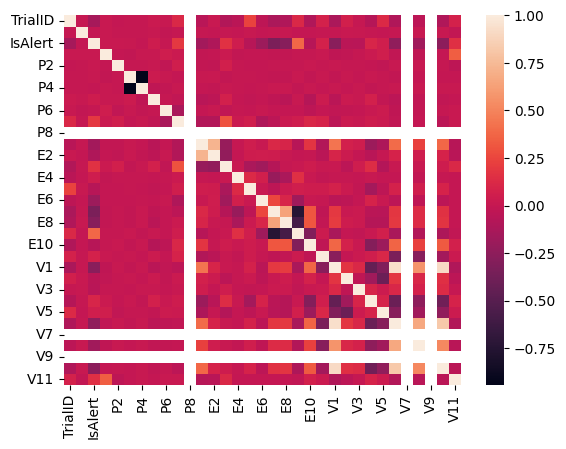

In [ ]:
sns.heatmap(train.corr())

# data preprocessing

divide the data

In [ ]:
y = train['IsAlert']
x = train.iloc[:,3:]

split the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


# multi variate model

# logistic regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_hat_train_logreg = log_reg.predict(x_train)
y_hat_test_logreg = log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def model_eval(actual,predicted):
  con_matrix=confusion_matrix(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print('The Accuracy of the model is: ', round(acc_score,2))
  print(con_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, y_hat_train_logreg)

The Accuracy of the model is:  0.71
[[130399  72928]
 [ 65193 214943]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.65    203327
           1       0.75      0.77      0.76    280136

    accuracy                           0.71    483463
   macro avg       0.71      0.70      0.71    483463
weighted avg       0.71      0.71      0.71    483463



In [ ]:
model_eval(y_test, y_hat_test_logreg)

The Accuracy of the model is:  0.71
[[32998 18219]
 [16315 53334]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66     51217
           1       0.75      0.77      0.76     69649

    accuracy                           0.71    120866
   macro avg       0.71      0.71      0.71    120866
weighted avg       0.71      0.71      0.71    120866



# decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_dtree)

The Accuracy of the model is:  1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test,y_hat_test_dtree)

The Accuracy of the model is:  0.99
[[50475   742]
 [  758 68891]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



# random forest classifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)


In [ ]:
model_eval(y_train,y_hat_train_rf)

The Accuracy of the model is:  1.0
[[203327      0]
 [     1 280135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test,y_hat_test_rf)

The Accuracy of the model is:  0.99
[[50669   548]
 [   76 69573]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
importances=rf.feature_importances_

In [ ]:
importances_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

In [ ]:
importances_df = importances_df.sort_values('importance', ascending=False)

In [ ]:
importances_df

,feature,importance
29,V11,0.159254
17,E10,0.099037
14,E7,0.060928
19,V1,0.058520
13,E6,0.057940
15,E8,0.057689
6,P7,0.057068
5,P6,0.054865
16,E9,0.053222
4,P5,0.045415


# Ada boost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)
y_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [ ]:
model_eval(y_train,y_train_ada)

The Accuracy of the model is:  0.86
[[160509  42818]
 [ 24340 255796]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83    203327
           1       0.86      0.91      0.88    280136

    accuracy                           0.86    483463
   macro avg       0.86      0.85      0.86    483463
weighted avg       0.86      0.86      0.86    483463



In [ ]:
model_eval(y_test,y_hat_test_ada)

The Accuracy of the model is:  0.86
[[40521 10696]
 [ 5929 63720]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     51217
           1       0.86      0.91      0.88     69649

    accuracy                           0.86    120866
   macro avg       0.86      0.85      0.86    120866
weighted avg       0.86      0.86      0.86    120866



# Gradient boosting classifier

In [ ]:
gb=GradientBoostingClassifier(n_estimators=150)
gb.fit(x_train,y_train)
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_gb)

The Accuracy of the model is:  0.9
[[168085  35242]
 [ 14131 266005]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87    203327
           1       0.88      0.95      0.92    280136

    accuracy                           0.90    483463
   macro avg       0.90      0.89      0.89    483463
weighted avg       0.90      0.90      0.90    483463



In [ ]:
model_eval(y_test,y_hat_test_gb)

The Accuracy of the model is:  0.9
[[42318  8899]
 [ 3449 66200]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     51217
           1       0.88      0.95      0.91     69649

    accuracy                           0.90    120866
   macro avg       0.90      0.89      0.89    120866
weighted avg       0.90      0.90      0.90    120866



# XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(n_estimators=200)
xgb.fit(x_train,y_train)
y_hat_train_xgb=xgb.predict(x_train)
y_hat_test_xgb=xgb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_xgb)

The Accuracy of the model is:  0.97
[[190956  12371]
 [  2008 278128]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    203327
           1       0.96      0.99      0.97    280136

    accuracy                           0.97    483463
   macro avg       0.97      0.97      0.97    483463
weighted avg       0.97      0.97      0.97    483463



In [ ]:
model_eval(y_test,y_hat_test_xgb)

The Accuracy of the model is:  0.97
[[47862  3355]
 [  623 69026]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     51217
           1       0.95      0.99      0.97     69649

    accuracy                           0.97    120866
   macro avg       0.97      0.96      0.97    120866
weighted avg       0.97      0.97      0.97    120866

